# Foundations of Data Mining: Assignment 3

- Group: 27
- Students: Xiaolei Wang (0981285) / Jiyang Li (0975662) 


In [7]:
# Global imports and settings
from preamble import *
%matplotlib inline
plt.rcParams['savefig.dpi'] = 100 # Use 300 for PDF, 100 for slides
# InteractiveShell.ast_node_interactivity = "all"
#HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides
InteractiveShell.ast_node_interactivity = "none"

In [8]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '88854e9607bcd390ff54881a727f43af'

##  Random Projections with 1-NN (6 points, 3+3)

In [9]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); 

In [77]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn import metrics
from sklearn.decomposition import PCA
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import pandas as pd

###  Study the effect on pairwise distances

In [177]:
# generate projection matrix R with dimension k*d
def getR(k, d):
    R = [[0 for i in range(d)] for j in range(k)] 
    for i in range(k):
        for j in range(d):
            R[i][j] = np.random.choice([1/np.sqrt(d),-1/np.sqrt(d)])
            j += 1
        i += 1        
    return np.array(R)

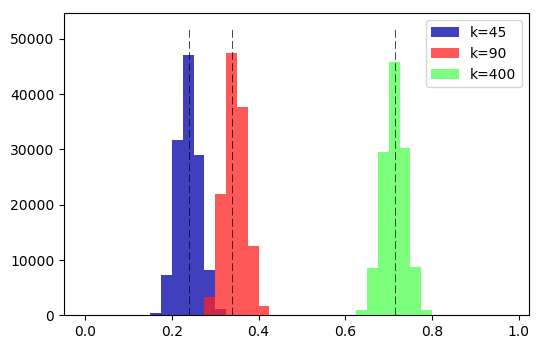

In [223]:
d = X.shape[1] # dimention of original data is 784 
K = [45, 90, 400]
N = 500
X_N = X[0:N] # choose first 500 pictures here

plt.figure()
for k in K:
    R = getR(k,d)

    X_rotate = mat(X_N)*mat(R).T
    phi = []

    for i in range(N):
        for j in range(i+1,N):
            dif_f = np.linalg.norm(X_rotate[i] - X_rotate[j])
            dif_p = np.linalg.norm(X_N[i] - X_N[j])
            phi.append(dif_f / dif_p)
    
    ratio = np.sqrt(k/d)
    bins = np.arange(0, 1, 0.025)
    plt.hist(pd.Series(np.array(phi)), bins, label='k=%d' % k, alpha=0.75)
    plt.plot([ratio,ratio],[0,52000],'k--')
plt.legend()
plt.show()

**Solution**

The values $\phi(p,q) = \frac{\|f(p)-f(q)\|}{\|p-q\|}$ for all pairs p and q are centered at $\sqrt \frac {k}{d}$.

Prove: Let $\bf r_i$ be ith row of $\bf R$ and $p-q=\lambda$ . 
$$\|f(p)-f(q)\|^2=\|{\bf R}\lambda \|^2=\sum_{i=1}^{k}({\bf r_i}\lambda)^2=\sum_{i=1}^{k}(\sum_{j=1}^{d} r_{ij}\lambda)^2$$
since $r_{ij}^2=\frac{1}{d}$ and $\mathbb{E}[r_{ij}]=0.5\cdot\frac{1}{\sqrt{d}}+0.5\cdot(-\frac{1}{\sqrt{d}})=0$. 
$$\mathbb{E}[\|f(p)-f(q)\|^2]=k\mathbb{E}[(\sum_{j=1}^{d}r_{ij}\lambda_j)^2]=k\mathbb{E}[\sum_{j=1}^{d}(r_{ij}\lambda_j)^2+\sum_{j=1}^{d}\sum_{t=1,t\neq j}^{d}(r_{ij}\lambda_j)(r_{it}\lambda_t)]$$ $$=k\mathbb{E}[\sum_{j=1}^{d}(r_{ij}\lambda_j)^2]+k\sum_{j=1}^{d}\sum_{t=1,t\neq j}^{d}\mathbb{E}[(r_{ij}\lambda_j)(r_{it}\lambda_t)]=k\mathbb{E}[\sum_{j=1}^{d}(r_{ij}\lambda_j)^2]+0=\frac{k}{d}\|\lambda\|^2$$ 
$$\mathbb{E}[\|p-q\|^2]=\mathbb{E}[\|\lambda\|^2]=\|\lambda\|^2$$

$$\frac{\mathbb{E}[\|f(p)-f(q)\|^2]}{\mathbb{E}[\|p-q\|^2]}=\frac{k}{d}$$

So, $$\frac{\mathbb{E}\|f(p)-f(q)\|]}{\mathbb{E}[\|p-q\|]}=\sqrt\frac{k}{d}$$. The ratio of projected length and original length are centered in the mean value $\sqrt\frac{k}{d}$.


### Study the effect on classification

In [224]:
y_N = y[0:N]
precision = []
recall = []
X_train, X_test, y_train, y_test = train_test_split(X_N, y_N, random_state=0,stratify=y_N)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm =  confusion_matrix(y_test, y_pred)
print('confusion_matrix for data without projection is:')
print(cm)
precision.append(precision_score(y_test, y_pred, average=None))
recall.append(recall_score(y_test, y_pred, average=None))

pre = []
rec = []
for k in K:
    
    R = getR(k,d)
    X_rotate = mat(X_N)*mat(R).T
    X_train, X_test, y_train, y_test = train_test_split(X_rotate, y_N, random_state=0,stratify=y_N)
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    cm =  confusion_matrix(y_test, y_pred)
    print('Confusion matrix for projection with k=%s' % k)
    print(cm)
    pre.append(precision_score(y_test, y_pred, average=None))
    rec.append(recall_score(y_test, y_pred, average=None))

confusion_matrix for data without projection is:
[[13  0  0  0  0  0  0  0  0  0]
 [ 0 14  1  0  0  0  0  1  0  0]
 [ 0  4  9  0  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  2]
 [ 0  0  0  0  0  9  1  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  0  1  0  0  0  0 11  0  1]
 [ 0  0  0  1  0  1  0  0  8  0]
 [ 0  0  0  1  0  1  0  0  0 12]]
Confusion matrix for projection with k=45
[[11  0  0  0  0  0  1  0  1  0]
 [ 0 14  1  0  0  0  0  0  0  1]
 [ 0  2  8  2  0  0  0  0  1  0]
 [ 0  0  1  9  0  0  0  1  0  1]
 [ 0  0  0  0 10  0  0  0  0  3]
 [ 0  0  0  1  0  8  1  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  1 11  0  1]
 [ 0  0  0  2  0  1  0  0  7  0]
 [ 1  0  0  1  1  0  0  0  0 11]]
Confusion matrix for projection with k=90
[[13  0  0  0  0  0  0  0  0  0]
 [ 0 14  1  0  0  0  0  1  0  0]
 [ 1  3  6  1  0  0  1  0  0  1]
 [ 0  1  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  1]
 [ 0  1  0  0  0  8  1  0  0  0]
 [ 0  0

In [225]:
pd.set_option('display.max_columns', None)
df_1 = pd.DataFrame(pre,index=K)
df_0 = pd.DataFrame(precision,index=['Unprojected'])
df_pre = df_0.append(df_1)
print('Precision Score')
display(df_pre)

pd.set_option('display.max_columns', None)
df_1 = pd.DataFrame(rec,index=K)
df_0 = pd.DataFrame(recall,index=['Unprojected'])
df_rec = df_0.append(df_1)
print('Recall Score')
display(df_rec)


Precision Score


,0,1,2,3,4,5,6,7,8,9
Unprojected,1.00,0.78,0.75,0.85,1.00,0.82,0.92,0.92,1.00,0.80
45,0.92,0.88,0.80,0.60,0.91,0.89,0.79,0.92,0.78,0.65
90,0.93,0.74,0.86,0.79,1.00,0.80,0.85,0.92,1.00,0.75
400,0.93,0.74,0.82,0.92,0.93,0.73,0.92,0.92,1.00,1.00


Recall Score


,0,1,2,3,4,5,6,7,8,9
Unprojected,1.00,0.88,0.69,0.92,0.85,0.9,1.0,0.85,0.8,0.86
45,0.85,0.88,0.62,0.75,0.77,0.8,1.0,0.85,0.7,0.79
90,1.00,0.88,0.46,0.92,0.92,0.8,1.0,0.85,0.8,0.86
400,1.00,0.88,0.69,0.92,1.00,0.8,1.0,0.85,0.8,0.86


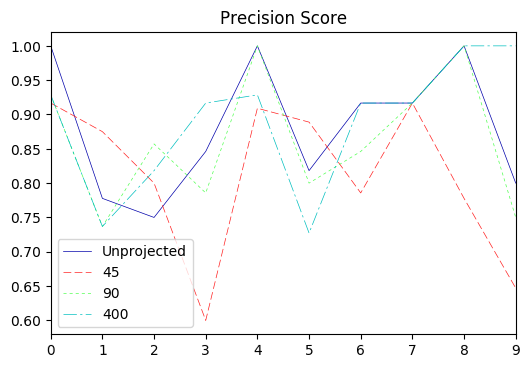

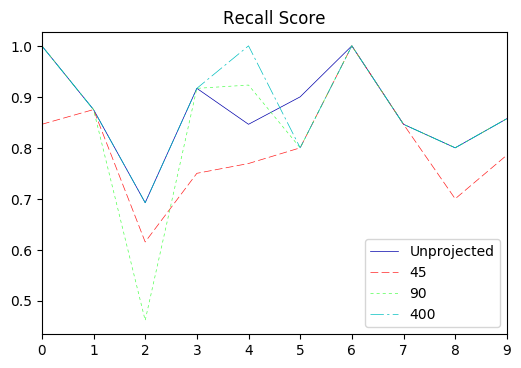

In [248]:
df_pre.T.plot(rot=1,title='Precision Score')
df_rec.T.plot(rot=1,title='Recall Score')

**Solution**

From Confusion matrix we could see how many correct and fault predictions are and how they distribute in each class. Correct predictions are located in diagonal of the table and errors are outside diagonal. Calculate diagonal value over all values in column we get the Precision Score and get Recall Score the same way by calculating in each row. Then we could get 10 Precision Scores and 10 Recall Scores for each class.

From DataFrames and Plots we can see that the scores of 1-NN classifier for unprojected data are relative high but not always the highest. And the scores for data when projected with k=45 is relative low but not always the lowest either, which means when we use 1-NN classifier on random projected data, the scores won't be infuenced much compared to the unprojected one especially for k=400 (the line of k=400 is the one similar to the line of unprojected data most). When we compared Precision with Recall we could see that Precision might be infuenced more by the dimension of data.

So we can conclude that the behaviors of 1-NN classifier for data with and without projection are similar and the influence would decrease when k goes closer to original dimension.  

## PCA of a handwritten digits (7 points, 3+2+2)

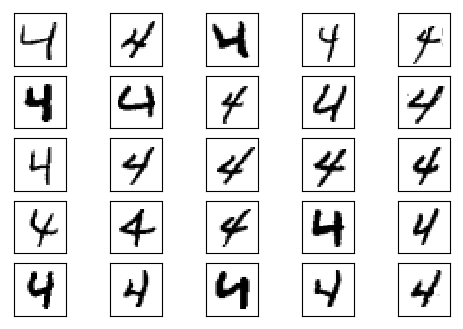

In [252]:
# build a list of figures on a 5x5 grid for plotting
def buildFigure5x5(fig, subfiglist):
    
    for i in range(0,25):
        pixels = np.array(subfiglist[i], dtype='float')
        pixels = pixels.reshape((28, 28))
        a=fig.add_subplot(5,5,i+1)
        imgplot =plt.imshow(pixels, cmap='gray_r')
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_yaxis().set_visible(False)
    return

# find the first 25 instances with label '4' and plot them
imgs = np.empty([25, 28*28], dtype='float')
j=0
for i in range(0,len(X)):
    if(y[i] == 4) and j < 25:
        imgs[j] = np.array(X[i], dtype='float')
        j += 1

buildFigure5x5(plt.figure(1),imgs)
plt.show()

### Step (a)

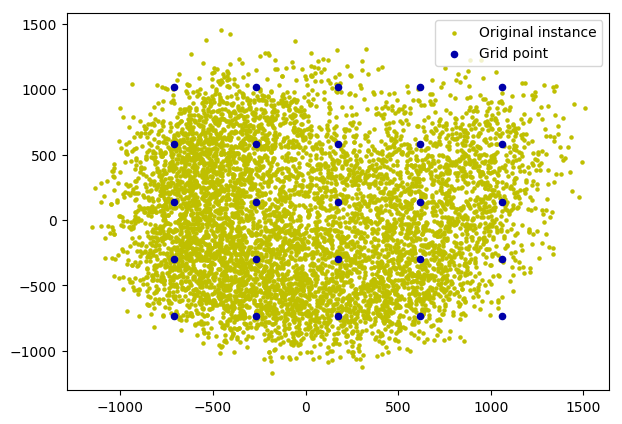

In [346]:
X_4 = X[y==4]
y_4 = y[y==4]
X_pca = PCA(n_components=2).fit_transform(X_4)
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, c='y', label='Original instance')

max0,max1 = np.amax(X_pca, axis=0)
min0,min1 = np.amin(X_pca, axis=0)

grid0 = np.arange(min0,max0,(max0-min0)/6)
grid1 = np.arange(min1,max1,(max1-min1)/6)

# Arrange the grid point from left to right, from top to down
grid_points = []
for i in reversed(grid1[1:6]):
    for j in grid0[1:6]:
        pair = [j, i]
        grid_points.append(pair)

grid = np.array(grid_points)
plt.scatter(grid[:,0], grid[:,1], s=20, marker='o', label='Grid point')

plt.legend()
plt.show()

Images for grid points


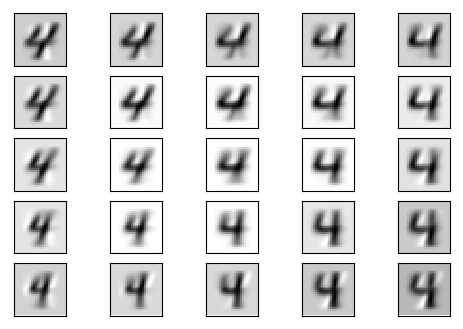

In [347]:
# Render each point as an image
pca = PCA(n_components=2).fit(X_4)
v = pca.components_
mean = np.mean(X_4,axis=0)
grid_img = []
for i in range(25):
    grid_img.append(mean + grid[i][0]*v[0] + grid[i][1]*v[1])
print('Images for grid points')
buildFigure5x5(plt.figure(2), grid_img)
plt.show()

In [344]:
print(i for i in range())

<generator object <genexpr> at 0x115b76f10>


### Step (b) 

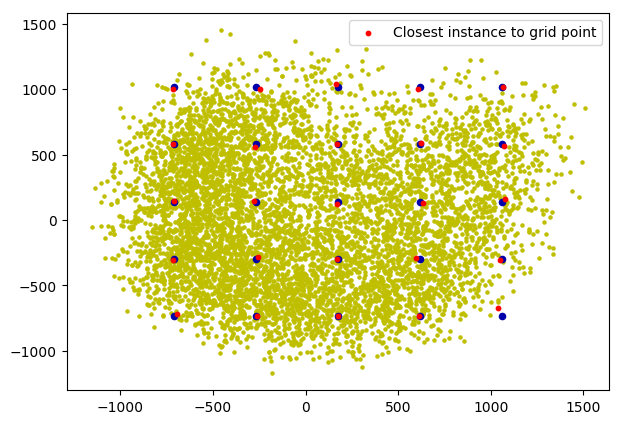

In [348]:
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, c='y')
plt.scatter(grid[:,0], grid[:,1], s=20, marker='o')

neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(X_pca)
dit,ind = neigh.kneighbors(list(grid))
plt.scatter(X_pca[ind,0],X_pca[ind,1],c='r', s=10, label='Closest instance to grid point')
plt.legend()
plt.show()

Images for closest instances


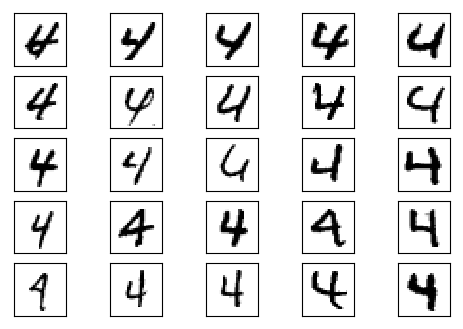

Images for grid points


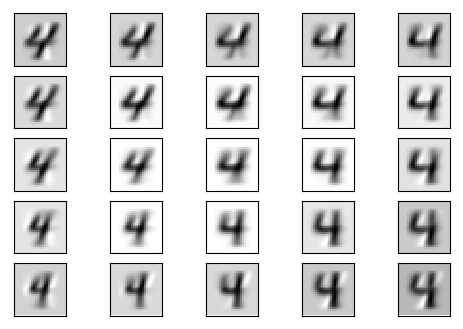

In [349]:
print('Images for closest instances')
buildFigure5x5(plt.figure(1), X_4[ind])
plt.show()
print('Images for grid points')
buildFigure5x5(plt.figure(2), grid_img)


**Solution**

Comparing the figures above we could see the closest instance is very similar with the corresponding gird point. Even though the image of grid points is obscure with just two features, we can still recognize the similarity of lean and fat or thin between '4's.

Comparing 25 figures by row we could see the digits become 'thinner', and comparing by column the digits go leaner to the left. We could also see the fat-or-thin feature apparently by just looking at the first and last rows. And find the lean feature by just looking at first and last columns.

So in 2-D plot we draw in Step(a), the digits become leaner with x-axis goes left and become thinner with y-axis goes down.

### Step (c)

In [283]:
def plt_component(fig,title):
    pixels = np.array(fig, dtype='float')
    pixels = pixels.reshape((28, 28))
    imgplot =plt.imshow(pixels, cmap='gray_r')
    plt.title(title)
    imgplot.axes.get_xaxis().set_visible(False)
    imgplot.axes.get_yaxis().set_visible(False)
    return

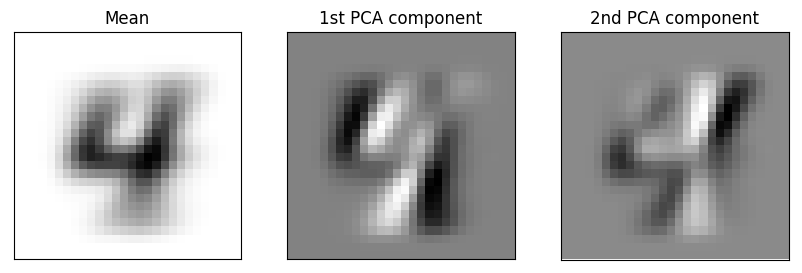

In [298]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt_component(np.mean(X_4,axis=0),'Mean')

plt.subplot(1,3,2)
plt_component(v[0],'1st PCA component')
plt.subplot(1,3,3)
plt_component(v[1],'2nd PCA component')

Color test


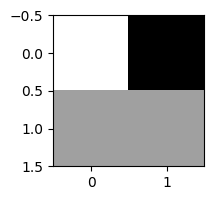

In [337]:
plt.figure(figsize=(2,2))
pp=[[0.4,2],[1,1]]
plt.imshow(pp,cmap='gray_r')
print('Color test')

**Solution**

We can see from color test that Matplotlib plots white with minimum pixel value and and black with maximum pixel value when we use 'gray_r', every value between max and min is ploted with gray. With this information we could draw the conclusion from PCA component. 

Since the two basis of PCA are orthogonal, the white part in 1st component corresponds to the black part in 2nd component, and vice versa. That's why we two '4' in one component. By analysing black '4' in each component we could see the 1st feature is more related with fat or thin, and 2nd feature is about lean. This result is same with the conclusion in Step(b).

## Projection onto a hyperplane (4 points)

**Solution**

(1) When $\mu=0$, $f({\bf p}) = {\bf V}^T {\bf p}.$ 
We could rewrite $f$ as:
$$f({\bf p}) = PM{\bf p}$$ where $P$ is the orthogonal projection onto first k coordinates, and $M$ is the rotation with each pair of row vectors is orthogonal and each row vector has unit length. Because $ M $ purly represents a rotation of the original data space, so length of vector will not change after rotation; but after the step of orthogonal projection, length of vector will decrease. Imagine that we don't consider rotation, we could write length of vector $\| \bf p -\bf q \| = \sqrt {\sum_{i=1}^{d} (\bf p_i - \bf q_i)^2}$, then if we decrease 1 dimension, the length of vector in new space will be $\sqrt {\sum_{i=1}^{d-1} (\bf p_i - \bf q_i)^2}$. So the length of vector is reduced every time we do orthogonal projection. 

We can also prove by Cauchy–Schwarz inequality:

Since columns of $\bf V$ are pairwise orthogonal and unit vectors $\bf v_1,\dots,\bf v_k \in \mathbb{R}^d$.

So for every $\bf p$ in vector space, we have:
$$\| f({\bf p})- f({\bf q})\|^2  = \|{\bf V}^T* ({\bf p}-{\bf q})\|^2=\langle {\bf V}^T* ({\bf p}-{\bf q}),{\bf V}^T* ({\bf p}-{\bf q})\rangle=$$ $$\langle{\bf V}^T* ({\bf p}-{\bf q}), ({\bf p}-{\bf q})\rangle \leq \| {\bf V}^T* ({\bf p}-{\bf q}) \| \| {\bf p}-{\bf q} \| = \| f({\bf p})- f({\bf q})\| \| {\bf p}-{\bf q} \|.$$
so we got: $$\|f({\bf p})- f({\bf q})\|\leq \|{\bf p}-{\bf q}\|$$

(2) When $\mu \neq 0$, $f({\bf p}) = {\bf V}^T ({\bf p}-\mu).$ $$\| f({\bf p})- f({\bf q})\|=\|{\bf V}^T* ({\bf p}-\mu-{\bf q}+\mu)\|=\|{\bf V}^T* ({\bf p}-{\bf q})\|$$
Then the generalization is the same as when $\mu=0$

## Locality-sensitive hashing (3 points, 1+2)

### Case: $p_2=0$

**Solution**

With AND construction, we will have $h_i(p)=h_i(q)$ for all $1\leq i\leq r$ yields to $(d_1, d_2, p_1^r, 0)$-sensitive family, then for OR construction we will have $h_i(p)=h_i(q)$ for some $1\leq i\leq L$ yields to $(d_1, d_2, 1-(1-p_1^r)^L, 0)$-sensitive family. 

If we want to maximize the success probabilities, we need to have the lowest r and largest L, which means $r=1, L=m$ is the optimal choice for construction.

With OR construction comes first, we will have $h_i(p)=h_i(q)$ for some $1\leq i\leq L$ yields to $(d_1, d_2, 1-(1-p_1)^L, 0)$-sensitive family, then for AND construction we will have $h_i(p)=h_i(q)$ for all $1\leq i\leq r$ yields to $(d_1, d_2, p_1, 0)$-sensitive family. Then choice of r and L for amplifying hash family is the same.

### Case: $p_2=\frac{1}{n}$

**Solution**

The number of false positives is a variable which ranged from 0 to n. The probability of X is $\Pr [X=x]=\frac{1}{n^x}$So the expected number of false negatives is:
$$\mathbb{E}[X]=\sum_{x=0}^{n}p(x)\cdot x=\sum_{x=0}^{n}\frac{1}{n^x}\cdot x=\sum_{x=1}^{n}\frac{1}{n^x}\cdot x\leq \sum_{x=1}^{n}\frac{1}{n^x}\cdot n=\sum_{x=1}^{n}\frac{1}{n^{x-1}}=\frac{1-\frac{1}{n^n}}{1-\frac{1}{n}}\approx 1 $$ when n goes to infinity.

So the Locality-sensitive hashing is quite good for classification since it's also combined with random partition.